In [2]:
from tensorflow.keras.datasets import mnist

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = training images (60,000 handwritten digits)
# y_train = training labels (0–9 for each image)
# x_test = test images (10,000 digits)
# y_test = test labels

from tensorflow.keras.utils import to_categorical

# Normalize pixel values(0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape to (28, 28, 1) since CNN expects 3D images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0],28, 28, 1))

# Convert lable to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Example label (one-hot):", y_train[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN Model
model = Sequential()

# 1st convolution + pooling
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

# 2nd convolution + pooling
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

# Flatten (convert 2D => 1D)
model.add(Flatten())

# Fully connected Dense layer
model.add(Dense(128, activation = 'relu'))

# Output layer (10 classes => digits 0-9)
model.add(Dense(10, activation = 'softmax'))

# print model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,        # try 5 first
                    batch_size=64,   # number of images per step
                    validation_split=0.1,  # 10% of training for validation
                    verbose=2)

# Evaluate the model on test dataset (10,000 images)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

print("Test accuracy:", round(test_accuracy * 100, 2), "%")
print("Test loss:", round(test_loss, 4))



Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)
Example label (one-hot): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 - 24s - 28ms/step - accuracy: 0.9518 - loss: 0.1629 - val_accuracy: 0.9792 - val_loss: 0.0670
Epoch 2/5
844/844 - 41s - 48ms/step - accuracy: 0.9851 - loss: 0.0474 - val_accuracy: 0.9873 - val_loss: 0.0479
Epoch 3/5
844/844 - 41s - 48ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9892 - val_loss: 0.0361
Epoch 4/5
844/844 - 23s - 28ms/step - accuracy: 0.9921 - loss: 0.0251 - val_accuracy: 0.9888 - val_loss: 0.0397
Epoch 5/5
844/844 - 40s - 48ms/step - accuracy: 0.9939 - loss: 0.0185 - val_accuracy: 0.9903 - val_loss: 0.0397
313/313 - 1s - 5ms/step - accuracy: 0.9903 - loss: 0.0302
Test accuracy: 99.03 %
Test loss: 0.0302


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


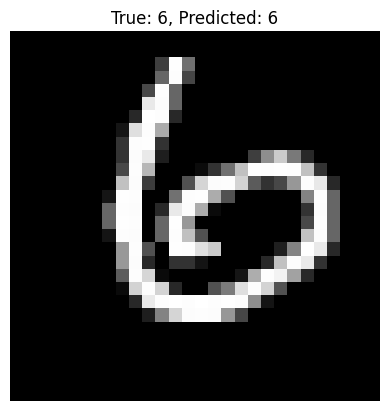

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


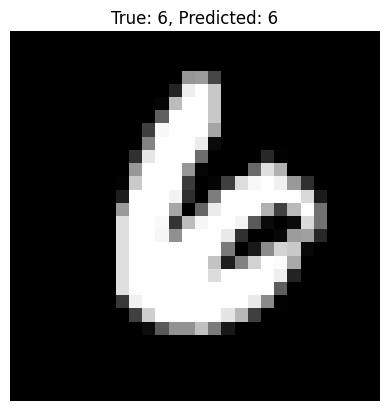

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


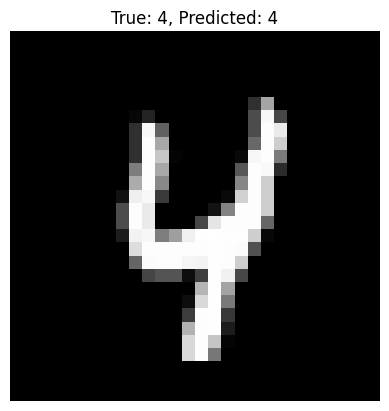

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


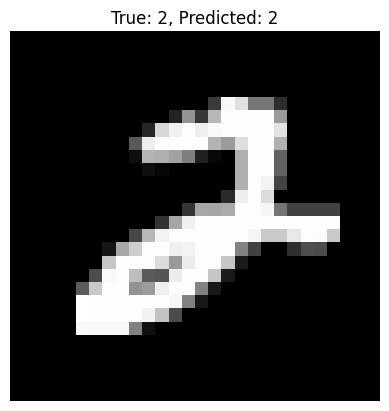

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


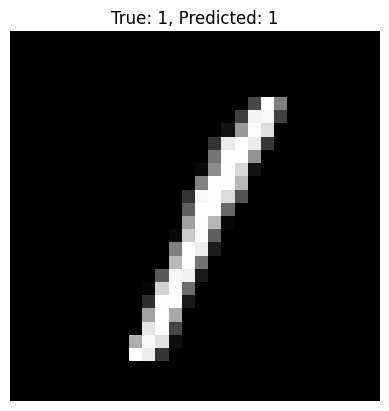

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


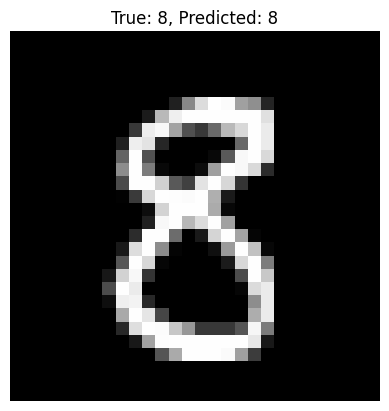

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


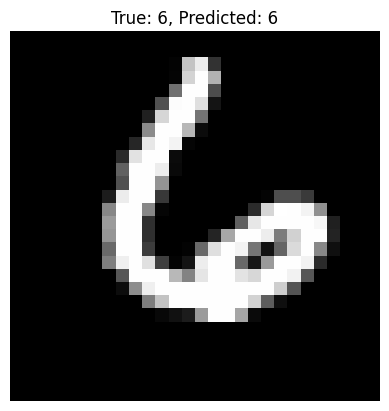

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


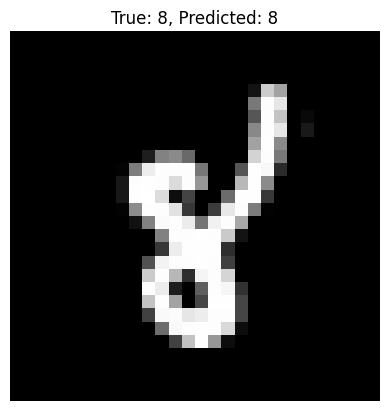

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


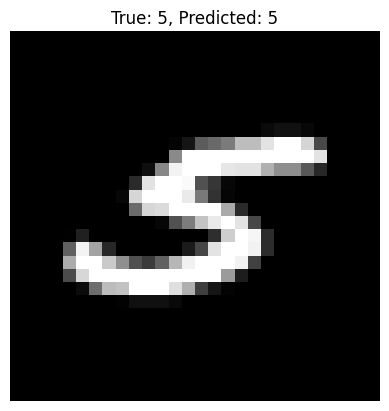

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


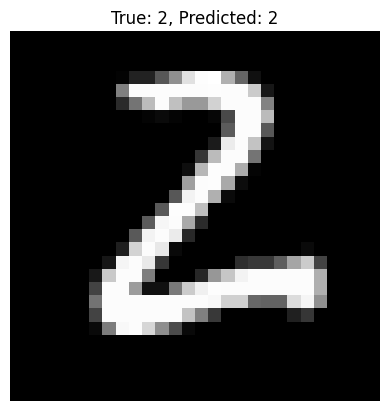

In [11]:
# Now test the model on some digits
import numpy as np
import matplotlib.pyplot as plt

# Pick 10 random test images
for i in range(10):
    index = np.random.randint(0, x_test.shape[0])
    img = x_test[index]
    label = np.argmax(y_test[index])  # true label
    prediction = np.argmax(model.predict(img.reshape(1,28,28,1)))

    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.title(f"True: {label}, Predicted: {prediction}")
    plt.axis("off")
    plt.show()

In [7]:
# Save the model in HDF5 format
model.save("mnist_cnn_model.keras")

In [8]:
# Load the Model Later
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("mnist_cnn_model.keras")

# Test it on test data
loss, acc = loaded_model.evaluate(x_test, y_test, verbose=0)
print("Restored model accuracy:", round(acc*100, 2), "%")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Restored model accuracy: 99.03 %


In [10]:
# Export the Model
from google.colab import files
files.download("mnist_cnn_model.h5")   # or .keras


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Create folder for sample predictions
os.makedirs("sample_predictions", exist_ok=True)

# Generate 5 random predictions
for i in range(5):
    index = np.random.randint(0, x_test.shape[0])
    img = x_test[index]
    label = np.argmax(y_test[index])  # true label
    prediction = np.argmax(model.predict(img.reshape(1,28,28,1)))

    # Plot and save image
    plt.imshow(img.reshape(28,28), cmap="gray")
    plt.title(f"True: {label}, Pred: {prediction}")
    plt.axis("off")

    file_path = f"sample_predictions/{i}_true{label}_pred{prediction}.png"
    plt.savefig(file_path, bbox_inches="tight")
    plt.close()

print("Sample predictions saved in 'sample_predictions/' folder")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Sample predictions saved in 'sample_predictions/' folder


In [13]:
import os
print(os.listdir("sample_predictions"))


['3_true1_pred2.png', '0_true0_pred0.png', '4_true7_pred7.png', '2_true2_pred2.png', '1_true4_pred4.png']
